Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

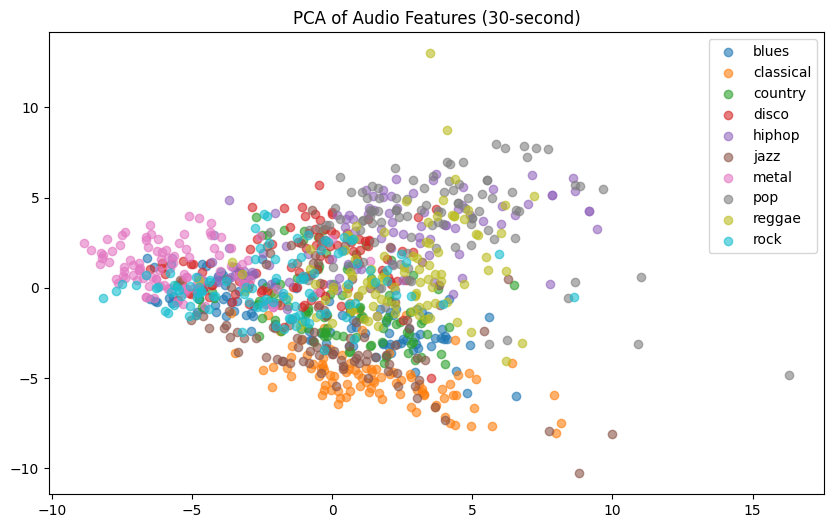

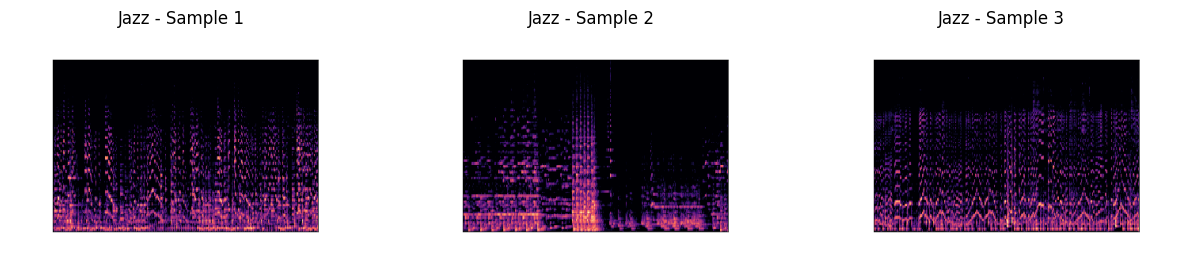

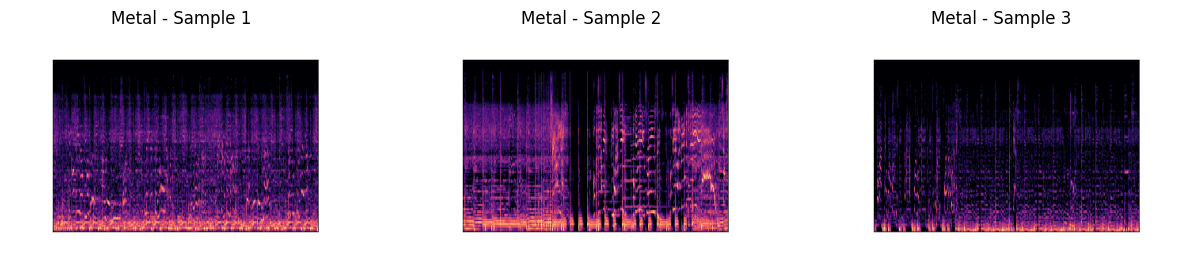

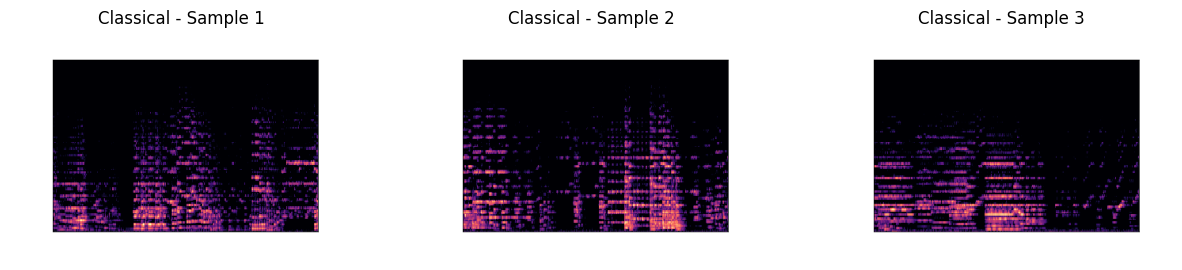

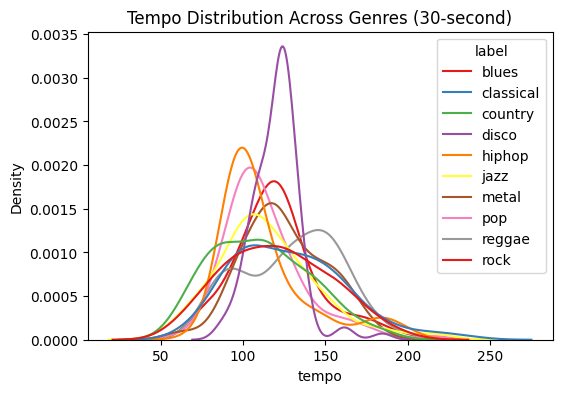

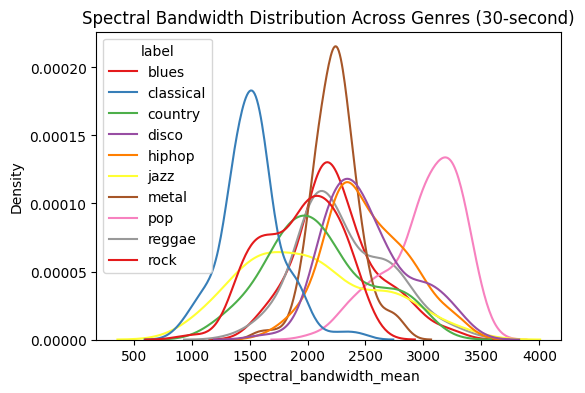

In [28]:
#### EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load features CSV files
features_30_sec = pd.read_csv('data/features_30_sec.csv')
features_3_sec = pd.read_csv('data/features_3_sec.csv')

print(features_30_sec.columns)

# Perform PCA on 30-second features and visualize
features_30_sec_numeric = features_30_sec.drop(['filename', 'label'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_30_sec_numeric)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
for i, genre in enumerate(GENRES):
    plt.scatter(pca_result[features_30_sec['label'] == genre, 0], pca_result[features_30_sec['label'] == genre, 1], label=genre, alpha=0.6)
plt.legend()
plt.title('PCA of Audio Features (30-second)')
plt.show()

# Plot mel spectrograms to visualize the time-frequency characteristics of different genres
def plot_mel_spectrograms(genre, n_samples=3):
    genre_folder = f'data/images_original/{genre}'
    spectrogram_files = os.listdir(genre_folder)[:n_samples] 
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(spectrogram_files):
        img = mpimg.imread(os.path.join(genre_folder, file))
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img)
        plt.title(f'{genre.capitalize()} - Sample {i+1}')
        plt.axis('off')
    plt.show()
plot_mel_spectrograms('jazz', n_samples=3)
plot_mel_spectrograms('metal', n_samples=3)
plot_mel_spectrograms('classical', n_samples=3)

# Plot tempo distribution for the 30-second features
plt.figure(figsize=(6, 4))
sns.kdeplot(data=features_30_sec, x='tempo', hue='label', palette='Set1')
plt.title('Tempo Distribution Across Genres (30-second)')
plt.show()

# Plot spectral bandwidth distribution for the 30-second features
plt.figure(figsize=(6, 4))
sns.kdeplot(data=features_30_sec, x='spectral_bandwidth_mean', hue='label', palette='Set1')
plt.title('Spectral Bandwidth Distribution Across Genres (30-second)')
plt.show()
